## Pandas analysis

This exercise consists in analyzing a dataset containg timing information from a series of
Time-to-Digital-Converters (_TDC_) implemented in a couple of FPGAs.

Each measurement (i.e. each row of the input file) consists of a flag that specifies the type of message (`HEAD`,
which in this case is always $1$), two addresses of the _TDC_ providing the signal (`FPGA` and `TDC_CHANNEL`),
and the timing information (`ORBIT_CNT`, `BX_COUNTER`, and `TDC_MEAS`).

Each _TDC_ count corresponds to $\frac{25}{30} =\frac{5}{6} = 8.3334$ ns, whereas a unit of `BX_COUNTER` corresponds
to $25$ ns, and the `ORBIT_CNT` is increased every $x$ `BX_COUNTER`.
This allows to store the time in a similar way to hours, minutes and seconds.

In [115]:
# If you didn't download it yet, please get the relevant file now!
!wget https://www.dropbox.com/s/xvjzaxzz3ysphme/data_000637.txt -P ~/data/

zsh:1: command not found: wget


1\. Create a Pandas DataFrame reading N rows of the 'data_000637.txt' dataset. Choose N to be smaller than or equal
to the maximum number of rows and larger that 10k.

In [116]:
import pandas as pd
import numpy as np

max_num_lines = 1310721
read_num_lines = 10721
df = pd.read_csv("./data/data_000637.txt", nrows=read_num_lines)
print(df)

       HEAD  FPGA  TDC_CHANNEL   ORBIT_CNT  BX_COUNTER  TDC_MEAS
0         1     0          123  3869200167        2374        26
1         1     0          124  3869200167        2374        27
2         1     0           63  3869200167        2553        28
3         1     0           64  3869200167        2558        19
4         1     0           64  3869200167        2760        25
...     ...   ...          ...         ...         ...       ...
10716     1     0           53  3869200274          25        12
10717     1     0          139  3869200274          27         0
10718     1     0           60  3869200274          21        27
10719     1     0          124  3869200274          28        13
10720     1     0           56  3869200274          20        16

[10721 rows x 6 columns]


2\. Find out the number of _BX_ in an _ORBIT_ (the value 'x').

In [117]:
orbit_time_s = (df['BX_COUNTER'].max() + 1) * 25 * 10 ** -9
bx_time_s = 25 * 10 ** -9
tdc_time_s = (25 / 30) * 10 ** -9
print(f"{df['BX_COUNTER'].max() + 1 = }", "is the number of BX in an ORBIT.")

df['BX_COUNTER'].max() + 1 = 3564 is the number of BX in an ORBIT.


3\. Find out how much the data taking lasted. You can either make an estimate based on the fraction of the measurements
(rows) you read, or perform this check precisely by reading out the whole dataset.

In [118]:
time_df = (df["ORBIT_CNT"] - df["ORBIT_CNT"].min()) * orbit_time_s\
          + df["BX_COUNTER"] * bx_time_s\
          + df["TDC_MEAS"] * tdc_time_s
print(f"{time_df.max() - time_df.min() = }")

time_df.max() - time_df.min() = 0.009475039166666666


This is the relative time that the data-taking took, from the first (temporaly) measurament, to the last, only counting
the first ~10K rows. It took close to a milisecond.

4\. Create a new column with the absolute time in ns (as a combination of the other three columns with timing
information).

In [119]:
df["ABS_TIME"] = df["ORBIT_CNT"] * orbit_time_s\
          + df["BX_COUNTER"] * bx_time_s\
          + df["TDC_MEAS"] * tdc_time_s
print(df)

       HEAD  FPGA  TDC_CHANNEL   ORBIT_CNT  BX_COUNTER  TDC_MEAS  \
0         1     0          123  3869200167        2374        26   
1         1     0          124  3869200167        2374        27   
2         1     0           63  3869200167        2553        28   
3         1     0           64  3869200167        2558        19   
4         1     0           64  3869200167        2760        25   
...     ...   ...          ...         ...         ...       ...   
10716     1     0           53  3869200274          25        12   
10717     1     0          139  3869200274          27         0   
10718     1     0           60  3869200274          21        27   
10719     1     0          124  3869200274          28        13   
10720     1     0           56  3869200274          20        16   

            ABS_TIME  
0      344745.734939  
1      344745.734939  
2      344745.734944  
3      344745.734944  
4      344745.734949  
...              ...  
10716  344745.744414  

5\. Replace the values (all 1) of the HEAD column randomly with 0 or 1.

In [120]:
for i in df.index:
    df.at[i, "HEAD"] = np.random.randint(0, 2)
print(df)

       HEAD  FPGA  TDC_CHANNEL   ORBIT_CNT  BX_COUNTER  TDC_MEAS  \
0         0     0          123  3869200167        2374        26   
1         1     0          124  3869200167        2374        27   
2         1     0           63  3869200167        2553        28   
3         0     0           64  3869200167        2558        19   
4         0     0           64  3869200167        2760        25   
...     ...   ...          ...         ...         ...       ...   
10716     1     0           53  3869200274          25        12   
10717     1     0          139  3869200274          27         0   
10718     1     0           60  3869200274          21        27   
10719     1     0          124  3869200274          28        13   
10720     1     0           56  3869200274          20        16   

            ABS_TIME  
0      344745.734939  
1      344745.734939  
2      344745.734944  
3      344745.734944  
4      344745.734949  
...              ...  
10716  344745.744414  

6\. Create a new DataFrame that contains only the rows with HEAD=1.

In [121]:
df2 = df[df["HEAD"] == 1]
print(df2)

       HEAD  FPGA  TDC_CHANNEL   ORBIT_CNT  BX_COUNTER  TDC_MEAS  \
1         1     0          124  3869200167        2374        27   
2         1     0           63  3869200167        2553        28   
9         1     0           60  3869200167        2788         7   
13        1     0           36  3869200167        2791        23   
14        1     0           56  3869200167        2789         3   
...     ...   ...          ...         ...         ...       ...   
10716     1     0           53  3869200274          25        12   
10717     1     0          139  3869200274          27         0   
10718     1     0           60  3869200274          21        27   
10719     1     0          124  3869200274          28        13   
10720     1     0           56  3869200274          20        16   

            ABS_TIME  
1      344745.734939  
2      344745.734944  
9      344745.734949  
13     344745.734949  
14     344745.734949  
...              ...  
10716  344745.744414  

7\. Make two occupancy plots (one for each FPGA), i.e. plot the number of counts per TDC channel

From here we use the new DataFrame with `HEAD = 1`.

array([<AxesSubplot:title={'center':'0'}>,
       <AxesSubplot:title={'center':'1'}>], dtype=object)

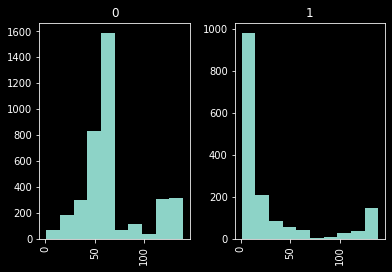

In [122]:
import matplotlib.pyplot as plt
plt.style.use("dark_background")

df2.hist(column="TDC_CHANNEL", by="FPGA")

8\. Use the groupby method to find out the noisy channels, i.e. the TDC channels with most counts (say the top 3)

In [123]:
print(df2.groupby("TDC_CHANNEL").size().nlargest(3))

TDC_CHANNEL
139    454
63     271
64     260
dtype: int64


9\. Count the number of unique orbits. Count the number of unique orbits
with at least one measurement from TDC_CHANNEL=139

In [124]:
print("Unique orbits:", df2["ORBIT_CNT"].nunique())
print("Unique, TDC-139, orbits:", df2[df2["TDC_CHANNEL"] == 139]["ORBIT_CNT"].nunique())
# This also works:
# print("Unique orbits:", df2.groupby("ORBIT_CNT").size().count())
# print("Unique, TDC-139, orbits: ",
#      df2[df2["TDC_CHANNEL"] == 139].groupby("ORBIT_CNT").size().count())


Unique orbits: 108
Unique, TDC-139, orbits: 107
